# @TSF Internship Task 2 

## Unsupervised ML Algorithm (K Means Clustering)

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [5]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# summary of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Finding the correlation between variables

In [12]:
corr = df.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Plotting the pair plot 

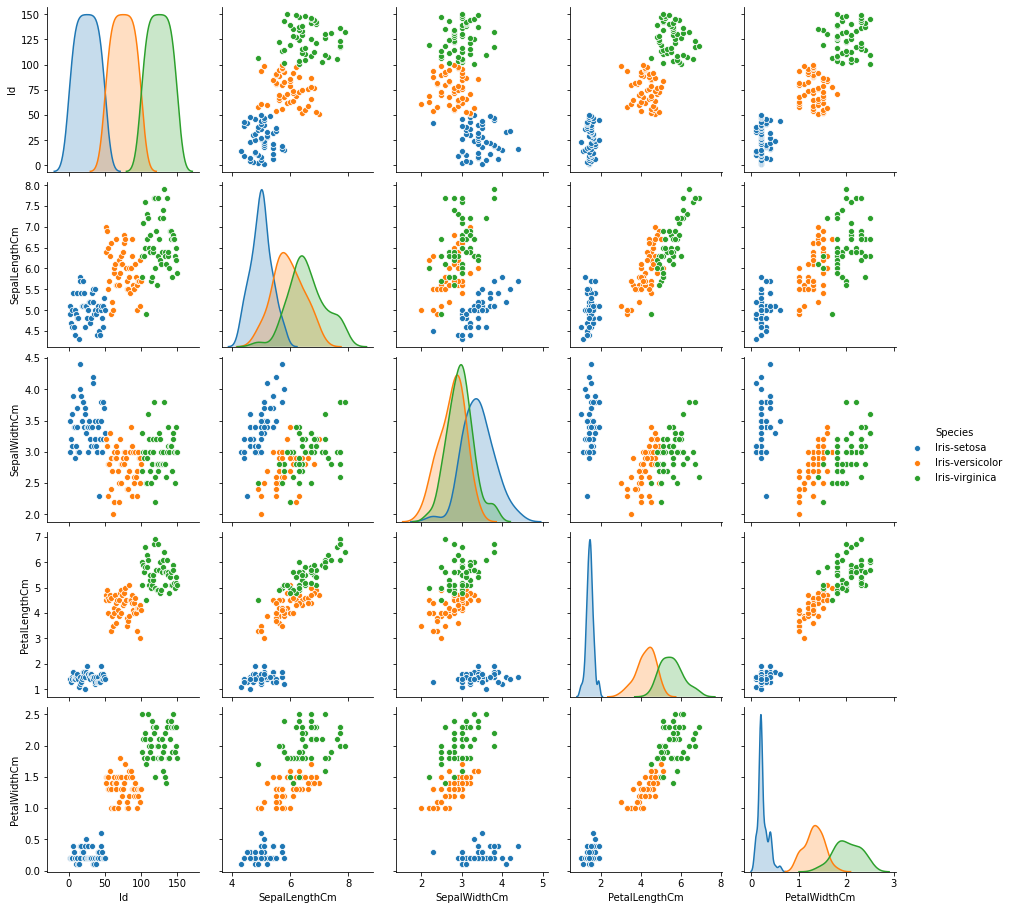

In [13]:
sns.pairplot(df, hue="Species")

It is clearly visible that IRIS-SETOSA has distinct clusters where as other two , slightly overlap each other

### Plotting the heatmap of correlated data

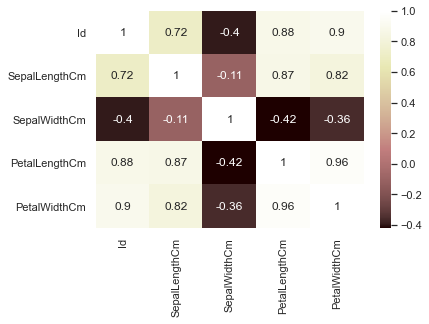

In [16]:
sns.set()
sns.heatmap(df.corr(), annot=True, cmap='pink')

Petal length is highly correlated to Petal Width

### Find the optimum number of clusters for K-Means and determine the value of K

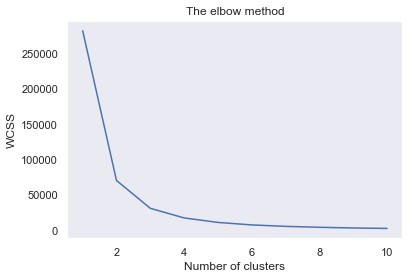

In [19]:
# Defining "x"
x = df.iloc[:, [0,1,2,3]].values

# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                   max_iter=300, n_init=10, random_state=0)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#plotting the results onto a line graph
# allowing us to observe 'The elbow'

plt.plot(range(1,11), wcss)
plt.grid()
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')# Within cluster sum of squares
plt.show()

In [21]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the data set 

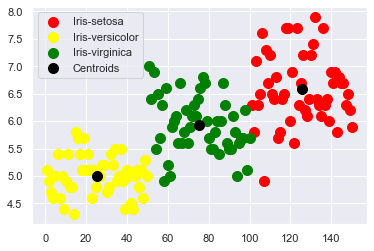

In [22]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1],
            s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1],
            s=100, c='yellow', label='Iris-versicolor')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1],
            s=100, c='green', label='Iris-virginica')

## Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='black', label="Centroids")
plt.legend()
